In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from scipy import stats
from scipy.stats import norm,skew

In [3]:
Insurance_data=pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [4]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No null counts

In [5]:
Insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Lets do some plotting :)

In [7]:

#cols=["bmi","charges"]
cols=["sex","smoker","children","region"]
new_data=Insurance_data.copy()

for col in cols:

    for val in new_data[col].unique():
        
        Q1=new_data.loc[new_data[col]==val,"charges"].quantile(0.25)
        Q3=new_data.loc[new_data[col]==val,"charges"].quantile(0.75)

        IQR=Q3-Q1

        low=Q1-1.5*IQR
        high=Q3+1.5*IQR

        med=new_data.loc[new_data[col]==val,"charges"].median()

        for row in new_data.loc[new_data[col]==val,"charges"]:
             if row<= low or row>= high:
                    new_data.loc[new_data[col]==val,"charges"]=new_data.loc[new_data[col]==val,"charges"].replace(row,med)
        
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


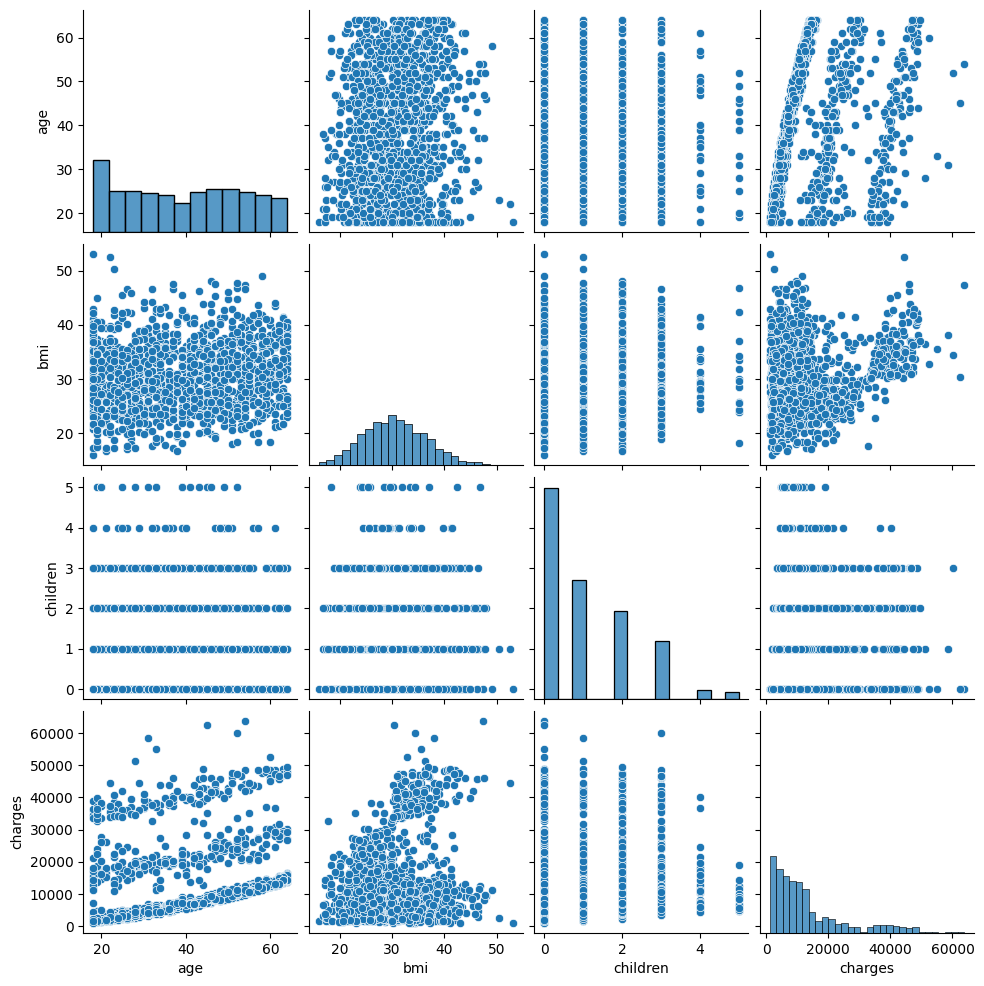

In [8]:
sns.pairplot(Insurance_data)

<Axes: xlabel='smoker', ylabel='charges'>

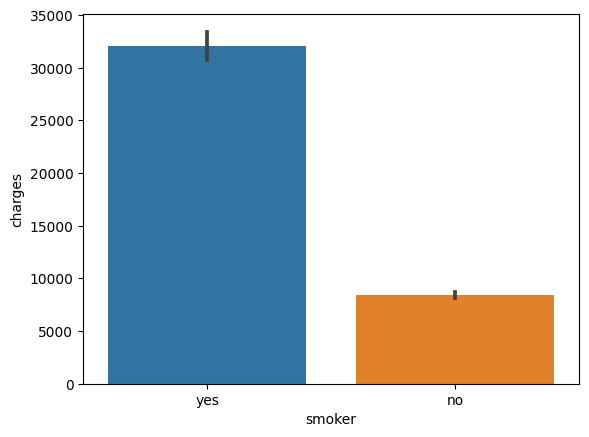

In [9]:
sns.barplot(x="smoker",y="charges",data=Insurance_data)

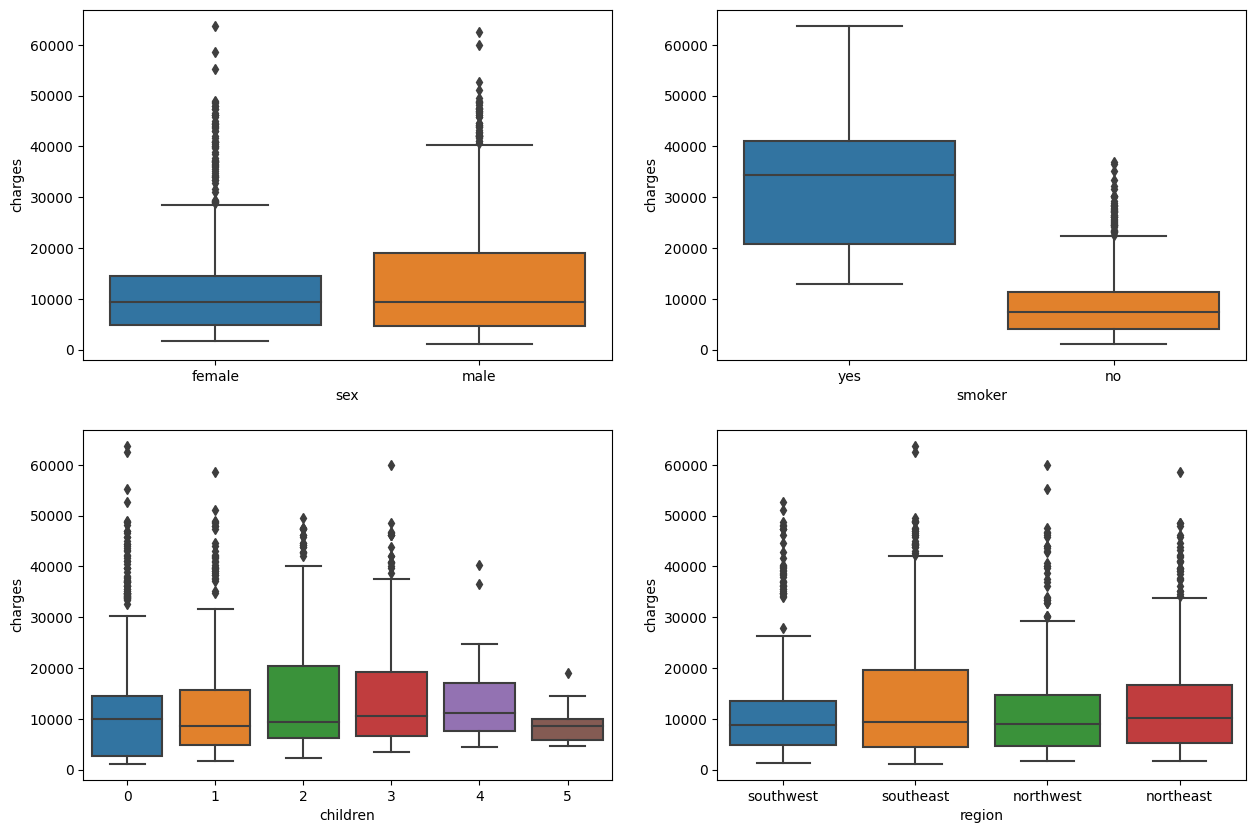

In [10]:
cols=["sex","smoker","children","region"]
plt.figure(figsize=(15,10))

for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=cols[i],y="charges",data=Insurance_data)

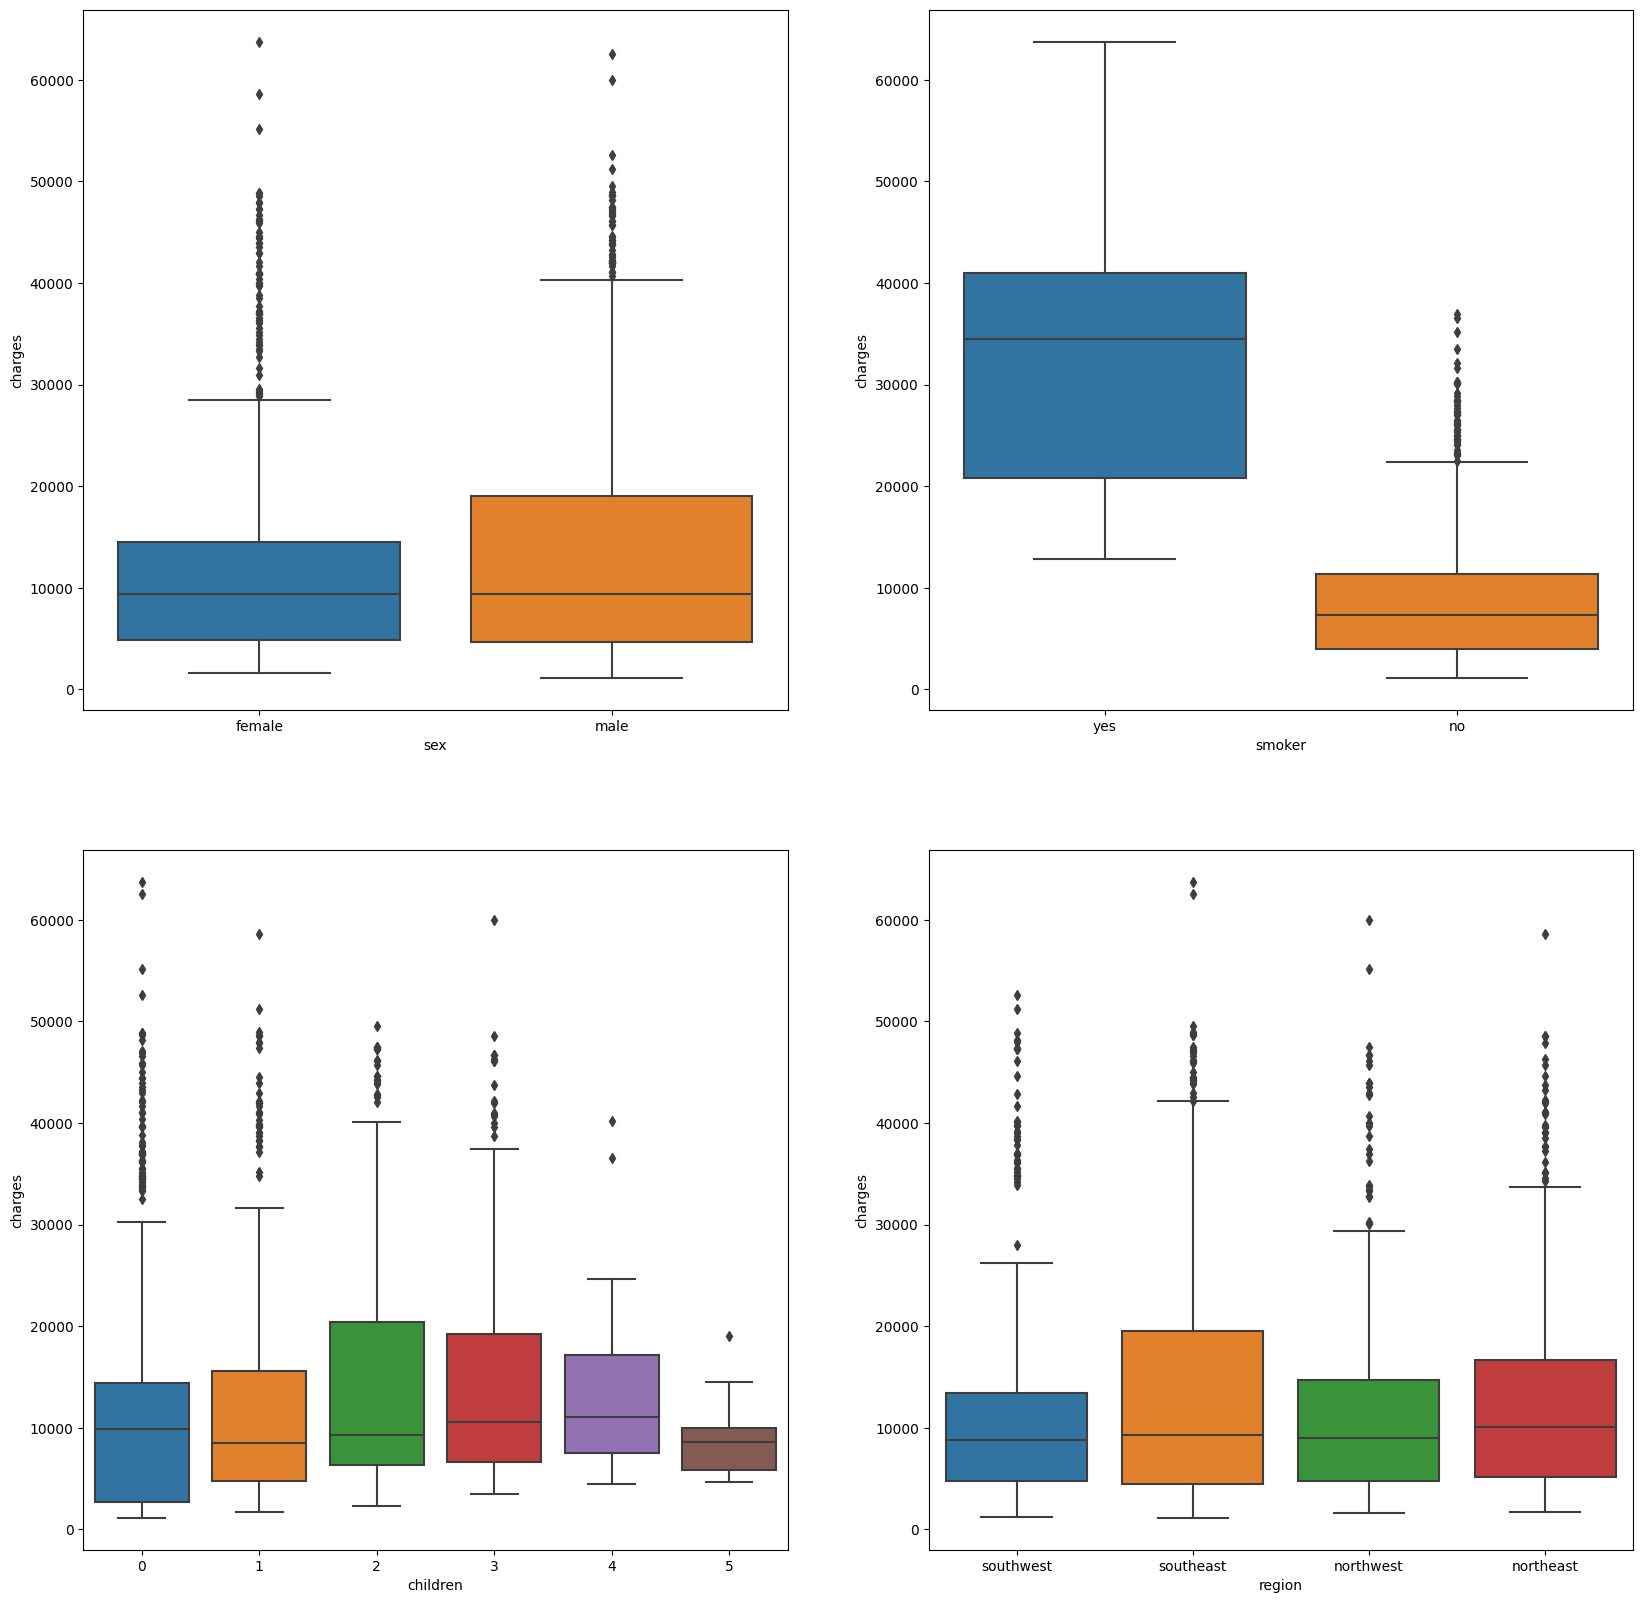

In [11]:



plt.figure(figsize=(20,20))

for i in range(len(cols)):
    
    plt.subplot(2,2,i+1)
    sns.boxplot(x=cols[i],y="charges",data=Insurance_data)

plt.show()

Large no. of outliers. Lets fix this. 

In [12]:
insurance_data=Insurance_data.copy()

for col in cols:

    for val in insurance_data[col].unique():

        
        q1 = insurance_data.loc[insurance_data[col]==val,"charges"].quantile(0.25)
        q3 = insurance_data.loc[insurance_data[col]==val,"charges"].quantile(0.75)
        
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(insurance_data.loc[insurance_data[col]==val,"charges"])
        
 #       print(col,val,q1,q3,iqr,Lower_tail,Upper_tail,med)
        
        for i in insurance_data.loc[insurance_data[col]==val,"charges"]:
              if i > Upper_tail or i < Lower_tail:
                     insurance_data.loc[insurance_data[col]==val,["charges"]] = insurance_data.loc[insurance_data[col]==val,["charges"]].replace(i, med)

#insurance_data.describe()

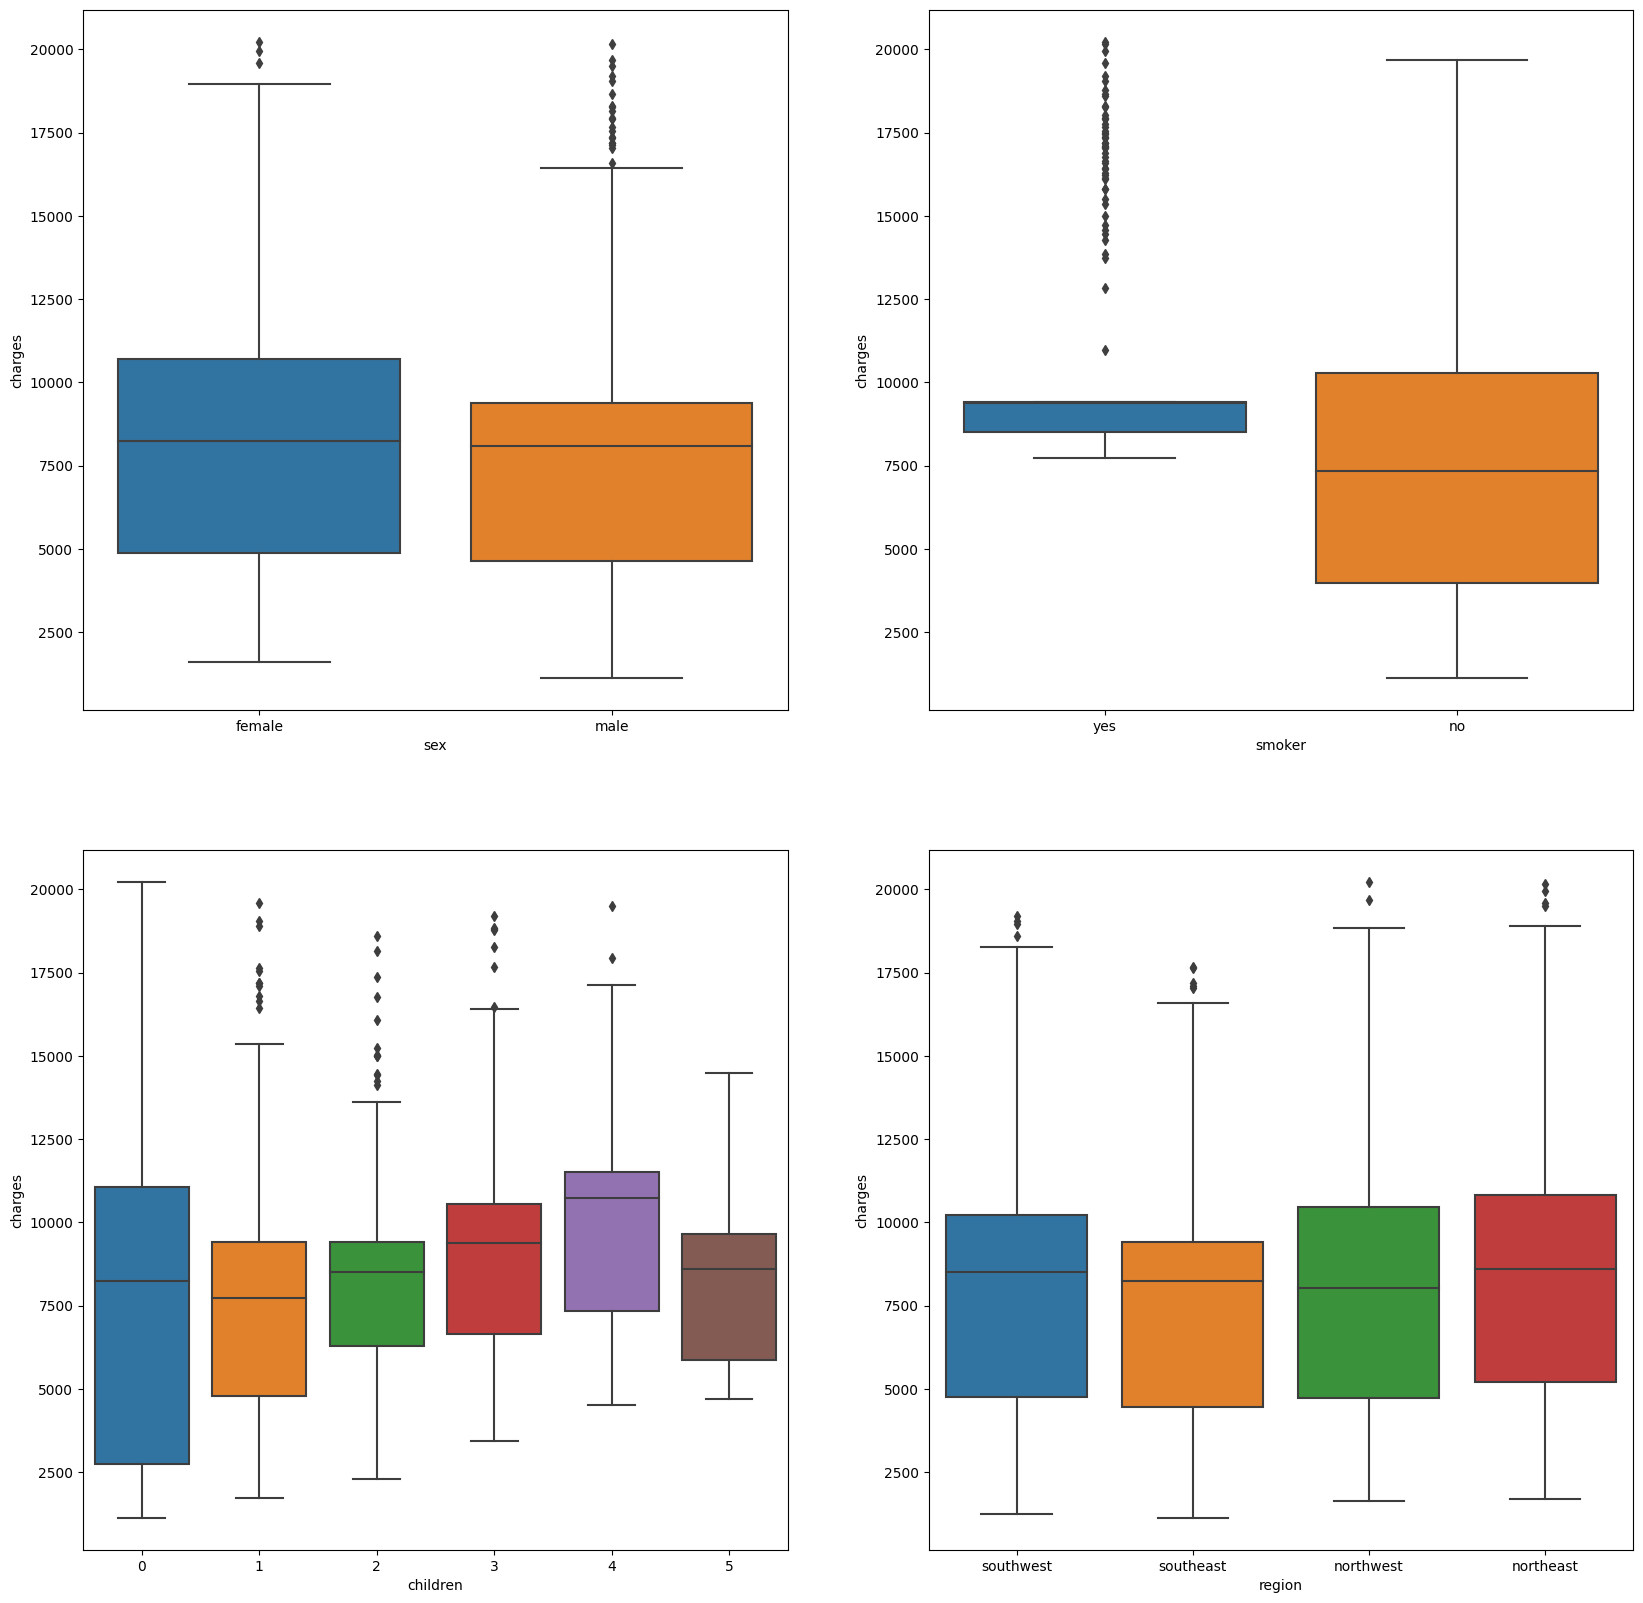

In [13]:
cols=["sex","smoker","children","region"]

plt.figure(figsize=(20,20))

for i in range(len(cols)):
    
    plt.subplot(2,2,i+1)
    sns.boxplot(x=cols[i],y="charges",data=insurance_data)

plt.show()

Lol whats happening here? The box plot for smoker yes category seems to have gotten wierd. I think thats because all the outliers that we saw for the other categories are actually a part of the smoker yes category so we should not get rid of them. 

Now lets look at Age and BMI. 

In [14]:
sns.scatterplot(x="bmi",y="charges",data=Insurance_data)sns.scatterplot(x="bmi",y="charges",data=Insurance_data)

SyntaxError: invalid syntax (1853176011.py, line 1)

In [ ]:
sns.scatterplot(x="age",y="charges",data=Insurance_data)

Says there is positive correlation between the age and insurance cost. But also one can notice that there are roughly three different categories. 
Not sure what to make of BMI. The data does not seem to be strongly suggestive that the cost increases linearly with the body mass index but in general the cost is higher for higher bmi. 

In [ ]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=Insurance_data)

In [ ]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=Insurance_data)

This is really helpful. From the 1st plot, it seems like the smoker category by itself cannot give a clear indication of the three groups in plot. Obviously the higher charges are for smokers. From the second plot, one can see that for smokers, if the bmi is larger than 30 there is an abrupt increase in the charges. 

Lets separate smoker yes and no categories and plot. 

In [ ]:
cols=["children","region","sex"]

plt.figure(figsize=(20,20))
i=1
for col in cols:
    for val in Insurance_data["smoker"].unique():
        
         plt.subplot(4,2,i)
         sns.boxplot(x=col,y="charges",data=Insurance_data[Insurance_data["smoker"]==val])
         i+=1

As one can see, the smoker categories have all higher values than the non-smoker counterparts.

Maybe lets remove the outliers for the data with no smokers and see how things are affected. 

In [ ]:
insurance_data=Insurance_data.copy()

cols=["sex","children","region"]

for col in cols:

    for val in insurance_data[col].unique():

        
        q1 = insurance_data.loc[(insurance_data[col]==val) & (insurance_data["smoker"]=="no"),"charges"].quantile(0.25)
        q3 = insurance_data.loc[(insurance_data[col]==val) & (insurance_data["smoker"]=="no"),"charges"].quantile(0.75)
        
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(insurance_data.loc[(insurance_data[col]==val) & (insurance_data["smoker"]=="no"),"charges"])
        
 #       print(col,val,q1,q3,iqr,Lower_tail,Upper_tail,med)
        
        for i in insurance_data.loc[(insurance_data[col]==val) & (insurance_data["smoker"]=="no"),"charges"]:
              if i > Upper_tail or i < Lower_tail:
                     insurance_data.loc[(insurance_data[col]==val) & (insurance_data["smoker"]=="no"),["charges"]] = insurance_data.loc[(insurance_data[col]==val) & (insurance_data["smoker"]=="no"),["charges"]].replace(i, med)
              #       insurance_data.drop(insurance_data[insurance_data["charges"]==i].index)
#sns.boxplot(x="smoker",y="charges",data=insurance_data)

In [ ]:
cols=["sex","children","region"]

plt.figure(figsize=(20,20))

num=0
for i in range(len(cols)):

        num+=1
        plt.subplot(2,2,num)
        sns.boxplot(x=cols[i],y="charges",data=insurance_data[insurance_data["smoker"]=="no"])

plt.show()

Seems like the outliers have gone away. Lets do the scatter plots again. 


In [ ]:
Insurance_data_new=pd.get_dummies(insurance_data)
#insurance_data[insurance_data["smoker"]=="yes",["charges"]].describe()

In [ ]:
#for index, row in Insurance_data.iterrows():
#    if (row["bmi"]>30) & (row["smoker"]=="yes") :
#        Insurance_data["BMI and smoker"]=0
#    elif (row["bmi"]<=30) & (row["smoker"]=="yes") :
#        Insurance_data["BMI and smoker"]=1
#    else:
#        Insurance_data["BMI and smoker"]=2

#Insurance_data.drop(["BMI and smoker","BMI<=30"],axis=1,inplace=True)
#sns.scatterplot(x = "age",y = "charges",hue = "BMI and smoker",data=Insurance_data)


Insurance_data_new.head()

In [ ]:
sns.set(font_scale=0.75)
sns.heatmap(Insurance_data_new.corr(),annot=True,fmt='.2f')

In [ ]:

correlation=Insurance_data_new.corr()
sns.set(font_scale=0.75)
sns.heatmap(correlation,annot=True,fmt='.2f')
plt.show()

From the correlation matrix, it looks like we can drop no. of children, region and sex from the data.

In [ ]:
Insurance_data=insurance_data.drop(["sex","children","region"],axis=1)
Insurance_data_new=pd.get_dummies(Insurance_data)
Insurance_data_new.drop("smoker_no",axis=1,inplace=True)
#Insurance_data_new.drop(Insurance_data[Insurance_data.age<20].index,axis=0,inplace=True)
Insurance_data_new.head()

In [ ]:
#Insurance_data["charges"]=np.log(Insurance_data.charges)
#sns.distplot(Insurance_data["charges"],fit=norm)

In [ ]:

sns.distplot(Insurance_data_new.age,fit=norm)
fig = plt.figure()
res = stats.probplot(Insurance_data.age, plot=plt)

In [ ]:
print("Skewness: %f" % Insurance_data_new.age.skew())
print("Kurtosis: %f" % Insurance_data_new.age.kurt())

Not sure how to fix this rn but will come back to it later. 

In [ ]:
#Insurance_data.bmi=np.log(Insurance_data.bmi)
sns.distplot(Insurance_data_new.bmi,fit=norm)

In [ ]:
X=Insurance_data_new[["age","bmi","smoker_yes"]]
Y=Insurance_data_new["charges"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=MinMaxScaler()
Xtrain=scaler.fit_transform(X_train)
Xtest=scaler.fit_transform(X_test)


In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

poly=PolynomialFeatures(degree=3)
model=LinearRegression()

X_train_transformed=poly.fit_transform(X_train)
X_test_transformed=poly.fit_transform(X_test)

model.fit(X_train_transformed,Y_train)

#print(X_test_transformed)
y_predict=model.predict(X_test_transformed)
#y_predict

plt.scatter(Y_test,y_predict)
plt.show()

print("training accuracy: {:.3f}".format(model.score(X_train_transformed,Y_train)))
print("test accuracy: {:.3f}".format(model.score(X_test_transformed,Y_test)))
print("r2_score: {:.3f}".format(r2_score(y_predict,Y_test)))

Lets use some regularization to see how the model performs.

In [ ]:
residuals=Y_test-y_predict
stats.probplot(residuals,dist="norm",plot=plt)

plt.show()

In [ ]:
from sklearn.linear_model import Ridge

num=0.1
ridge=Ridge(alpha=num).fit(X_train_transformed,Y_train)
print(ridge.score(X_train_transformed,Y_train))
print(ridge.score(X_test_transformed,Y_test))

In [ ]:
from sklearn.linear_model import Lasso

num=10
lasso=Lasso(alpha=num,max_iter=10000).fit(X_train_transformed,Y_train)
print(lasso.score(X_train_transformed,Y_train))
print(lasso.score(X_test_transformed,Y_test))

Seems like both Ridge and Lasso regularization seem to not contribute to any change in the scores on the test and training data. This is probably because the number of independent parameters is quite small in this case and there is not much room to adjust their dependence. Also since the dataset is large, linear reg. works fine without the need for regularization.   